# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [2]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

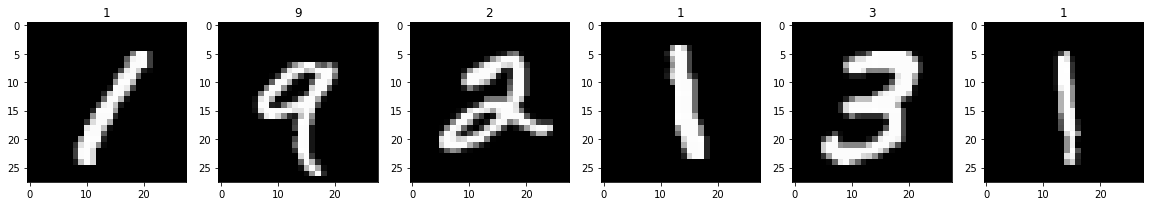

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first + shift six training images
shift = 3
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1) # nrows, ncols, plot_number, xticks=[], yticks=[]
    ax.imshow(X_train[i+shift], cmap='gray')
    ax.set_title(str(y_train[i+shift]))

### 3. View an Image in More Detail

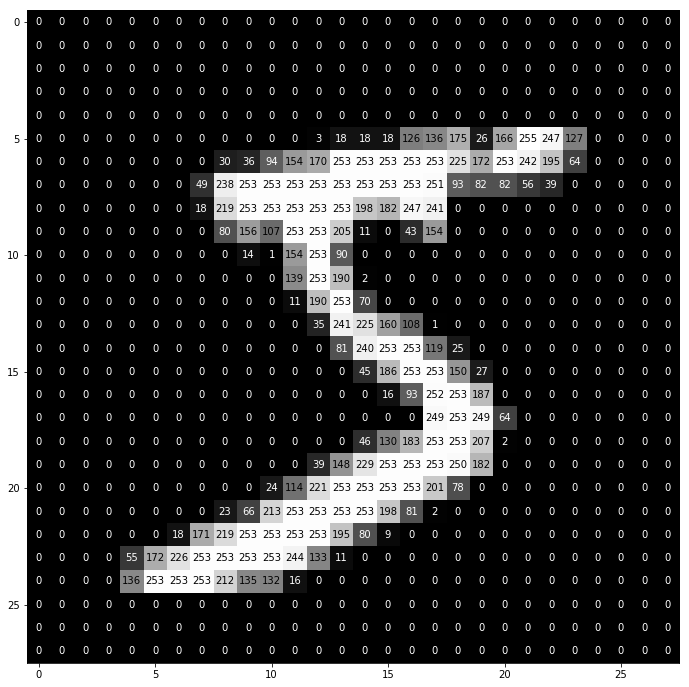

In [5]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [9]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [6]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

print('X_train.shape', X_train.shape)
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(64, activation='sigmoid')) # relu
#model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model_name = 'mnist.test-best.hdf5'
model.summary()

X_train.shape (60000, 28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                650       
Total params: 55,050.0
Trainable params: 55,050.0
Non-trainable params: 0.0
_________________________________________________________________


### 7. Compile the Model

In [104]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [105]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('Test score: ' , score)

Test accuracy: 10.8400%
Test score:  [2.4615694038391114, 0.1084]


### 9. Train the Model

In [100]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath=model_name, 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.9626 - acc: 0.7717 - val_loss: 0.4298 - val_acc: 0.8903
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.3832 - acc: 0.8906 - val_loss: 0.3197 - val_acc: 0.9044
Epoch 3/10
48000/48000 [==============================] - 1s - loss: 0.3186 - acc: 0.9058 - val_loss: 0.2837 - val_acc: 0.9188
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.2817 - acc: 0.9161 - val_loss: 0.2566 - val_acc: 0.9236
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.2603 - acc: 0.9221 - val_loss: 0.2415 - val_acc: 0.9280
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.2420 - acc: 0.9266 - val_loss: 0.2278 - val_acc: 0.9323
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.2301 - acc: 0.9300 - val_loss: 0.2355 - val_acc: 0.9292
Epoch 8/10
48000/48000 [==============================] - 1s 

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [19]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [101]:
model.load_weights(model_name)
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 93.6400%


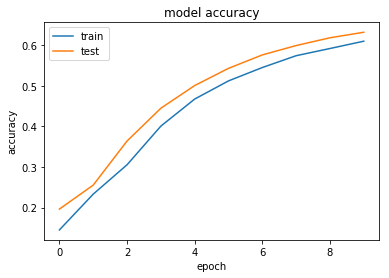

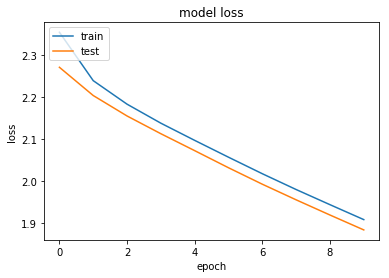

In [10]:
# print(hist.history.keys()) # dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])
history = hist.history
def draw_error_surface(history):
    # summarize history for accuracy
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
draw_error_surface(hist.history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 118,282.0
Trainable params: 118,282.0
Non-trainable params: 0.0
________________________________________________________________

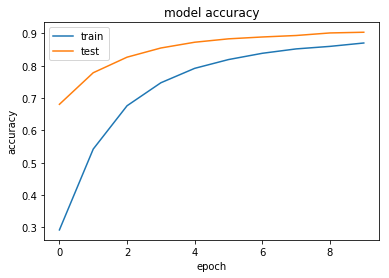

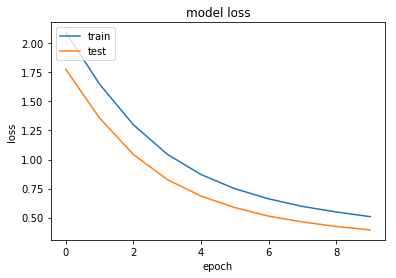

Test accuracy: 90.4200%


In [15]:
## all steps to train with SGD optimizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint   

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(128, activation='sigmoid')) # relu
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# train the model
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2,
          verbose=0, shuffle=True)
# show error surface
draw_error_surface(hist.history)
# print score
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)